**Name : Tasya Amanda Adinegara <br>
Email  : tasyaadinegara@gmail.com**

In [ ]:
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6Cay.png  
  inflating: rockpaperscissors/scissors/2DEYFsJ27UgVq

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
path =  '/content/rockpaperscissors'

In [ ]:
os.listdir(path)

['rock', 'README_rpc-cv-images.txt', 'rps-cv-images', 'paper', 'scissors']

In [ ]:
trainDir = os.path.join(path, 'Train')
testDir = os.path.join(path, 'Test')

In [ ]:
trainDir

'/content/rockpaperscissors/Train'

In [ ]:
os.mkdir(trainDir)
os.mkdir(testDir)

In [ ]:
rockDir = os.path.join(path, 'rock')
paperDir = os.path.join(path, 'paper')
scissorsDir = os.path.join(path, 'scissors')

In [ ]:
rockDir

'/content/rockpaperscissors/rock'

In [ ]:
train_rockDir, test_rockDir = train_test_split(os.listdir(rockDir), test_size = 0.2)
train_paperDir, test_paperDir = train_test_split(os.listdir(paperDir), test_size = 0.2)
train_scissorsDir, test_scissorsDir = train_test_split(os.listdir(scissorsDir), test_size = 0.2)

In [ ]:
len(train_rockDir)
len(test_rockDir)

146

In [ ]:
trainRock = os.path.join(trainDir, 'rock')
trainPaper = os.path.join(trainDir, 'paper')
trainScissors = os.path.join(trainDir, 'scissors')

In [ ]:
trainRock

'/content/rockpaperscissors/Train/rock'

In [ ]:
testRock = os.path.join(testDir, 'rock')
testPaper = os.path.join(testDir, 'paper')
testScissors = os.path.join(testDir, 'scissors')

In [ ]:
os.mkdir(trainRock)
os.mkdir(trainPaper)
os.mkdir(trainScissors)

In [ ]:
os.mkdir(testRock)
os.mkdir(testPaper)
os.mkdir(testScissors)

In [ ]:
import shutil

for i in train_rockDir:
  shutil.copy(os.path.join(rockDir, i), os.path.join(trainRock, i))
for i in train_paperDir:
  shutil.copy(os.path.join(paperDir,i), os.path.join(trainPaper,i))
for i in train_scissorsDir:
  shutil.copy(os.path.join(scissorsDir,i), os.path.join(trainScissors,i))

for i in test_rockDir:
  shutil.copy(os.path.join(rockDir, i), os.path.join(testRock,i))
for i in test_paperDir:
  shutil.copy(os.path.join(paperDir,i), os.path.join(testPaper,i))
for i in test_scissorsDir:
  shutil.copy(os.path.join(scissorsDir,i), os.path.join(testScissors,i))

# Preparing Data

In [ ]:
dataGen = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range = 20, 
    horizontal_flip = True, 
    shear_range = 0.2, 
    fill_mode = 'nearest'
)

In [ ]:
img_height = 150
img_width = 150

In [ ]:
trainGenerator = dataGen.flow_from_directory(
    trainDir, 
    target_size = (img_height, img_width), 
    batch_size = 32, 
    class_mode = 'categorical'
)

testGenerator = dataGen.flow_from_directory(
    testDir,
    target_size = (img_height, img_width), 
    batch_size = 32, 
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
exp_trainingImg, _ = next(trainGenerator)

In [ ]:
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [ ]:
def pltImg(images):
    fig, axes = plt.subplots(1, 3, figsize=(10,8))
    axes = axes.flatten()
    for img, ax in zip( images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

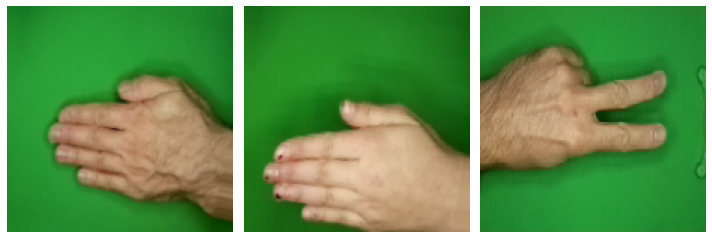

In [ ]:
pltImg(exp_trainingImg[:3])

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 18496)           

In [ ]:
history = model.fit(
    trainGenerator,
    steps_per_epoch = 20,
    epochs = 15,
    validation_data = testGenerator,
    validation_steps= 5,
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.01,
        patience=4
    )]
)

Epoch 1/20
20/20 [==============================] - 18s 901ms/step - loss: 1.2033 - accuracy: 0.3656 - val_loss: 1.0265 - val_accuracy: 0.4375
Epoch 2/20
20/20 [==============================] - 18s 877ms/step - loss: 0.9711 - accuracy: 0.5819 - val_loss: 0.7906 - val_accuracy: 0.7500
Epoch 3/20
20/20 [==============================] - 18s 893ms/step - loss: 0.7747 - accuracy: 0.6719 - val_loss: 0.6548 - val_accuracy: 0.7625
Epoch 4/20
20/20 [==============================] - 18s 892ms/step - loss: 0.5257 - accuracy: 0.8156 - val_loss: 0.5133 - val_accuracy: 0.8500
Epoch 5/20
20/20 [==============================] - 18s 890ms/step - loss: 0.4518 - accuracy: 0.8219 - val_loss: 0.3009 - val_accuracy: 0.9250
Epoch 6/20
20/20 [==============================] - 18s 896ms/step - loss: 0.2927 - accuracy: 0.8984 - val_loss: 0.2717 - val_accuracy: 0.9375
Epoch 7/20
20/20 [==============================] - 18s 891ms/step - loss: 0.2305 - accuracy: 0.9266 - val_loss: 0.1409 - val_accuracy: 0.9563

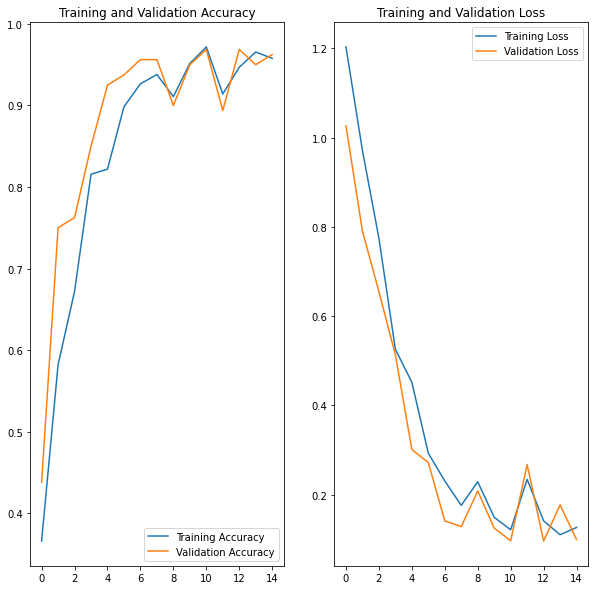

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


In [ ]:
uploaded_files = files.upload()

def cek_images():
  for fn in uploaded_files.keys():
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    
    print(classes)
    if (classes==[[1., 0., 0.]]).all():
      print('Paper')
    elif (classes==[[0., 1., 0.]]).all():
      print('Rock')
    elif (classes==[[0., 0., 1.]]).all():
      print('Scissors')

Saving ZULuRlvYzTJM8jC3.png to ZULuRlvYzTJM8jC3.png


[[0. 1. 0.]]
Rock


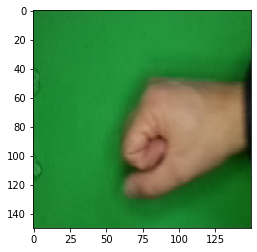

In [ ]:
cek_images()

[[0. 0. 1.]]
Scissors


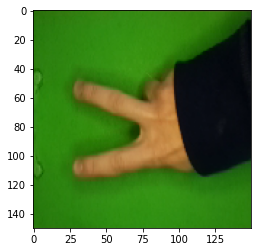

In [ ]:
cek_images()

[[1. 0. 0.]]
Paper


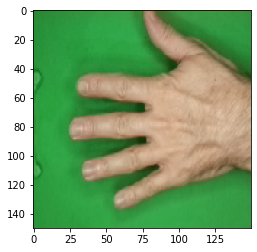

In [ ]:
cek_images()